# Day 3 - Afternoon

## Examples

Now that we have went over the basics of what's going on under the hood of a DFT code. Let's see these ideas occur in action!

We are going to look into the electronic structure of a **metal** and **insulator**.

**Question:** How does the electronic structure differ between a metal and insulator?

The two materials that we will investigate are
    
- Aluminum (Al)
- Table salt (NaCl)

In [1]:
using DFTK
using Plots

### Aluminium (Al)

3 valence electrons, 1 Al atom per unit cell.

**Prediction:** metallic with 3/2 bands filled on average.

#### Crystal structure

<img src="../structure/al.png" alt="drawing" width="300" align="left"/>

In [64]:
# crystal structure of Aluminium (face-centerd cubic)
convert2bohr = x -> x/0.53           # in-line function
a = b = c = convert2bohr(2.856);     # lattice parameters 
positions = [[0.0, 0.0, 0.0]];

In [65]:
lattice = a * 0.5 * [[0 1 1]; 
                     [1 0 1];
                     [1 1 0]]

3×3 Array{Float64,2}:
 0.0      2.69434  2.69434
 2.69434  0.0      2.69434
 2.69434  2.69434  0.0

In [66]:
Al = ElementPsp(:Al, psp=load_psp(:Al, functional="lda"))
atoms = [Al => positions]

1-element Array{Pair{ElementPsp,Array{Array{Float64,1},1}},1}:
 ElementPsp(13, :Al, PspHgh(3, 0.45, [-8.49135116, 0.0, 0.0, 0.0], 1, [0.46010427, 0.53674439], [[5.08833953 -1.03784325; -1.03784325 2.67969975], [2.19343827]], "hgh/lda/al-q3.hgh", "Al GTH-PADE-q3 GTH-LDA-q3")) => [[0.0, 0.0, 0.0]]

In [67]:
model = model_LDA(lattice, atoms, temperature=0.01);

In [68]:
Ecut = 30 # Ha
kgrid = [20, 20, 20];
@time basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);

  1.803200 seconds (272.39 k allocations: 195.594 MiB, 2.56% gc time)


In [69]:
@time scfres = self_consistent_field(basis);

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -1.802952487929         NaN   1.44e-01    2.7 
  2   -1.803251415868   -2.99e-04   2.74e-02    1.0 
  3   -1.803264105913   -1.27e-05   8.38e-04    2.9 
  4   -1.803265022579   -9.17e-07   3.47e-05    4.6 
 85.627207 seconds (12.49 M allocations: 9.949 GiB, 2.58% gc time)


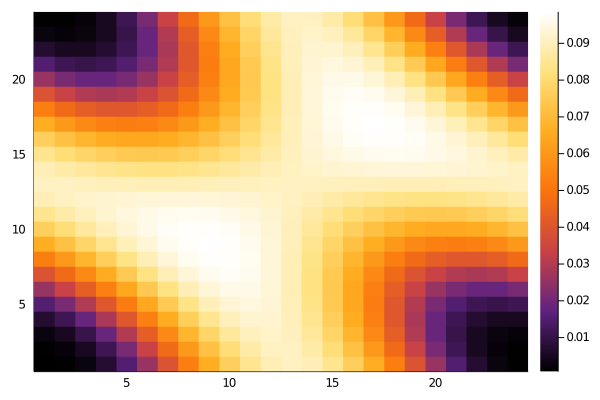

In [71]:
heatmap(scfres.ρ.real[:, :, 1, 1], c=:sunset)

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:06


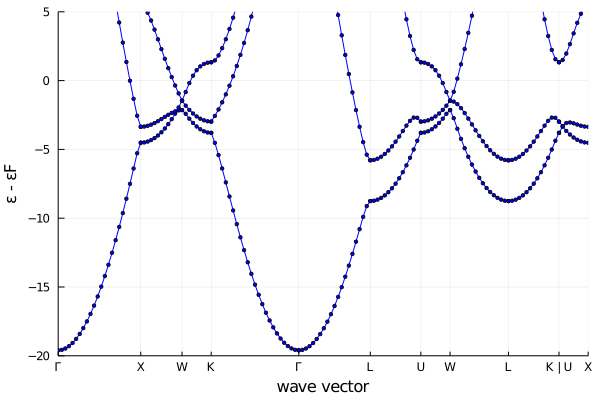

In [42]:
al_bands = plot_bandstructure(scfres, kline_density=10)
plot!(al_bands, ylims=(-20, 5), ylabel="ε - εF")

In [45]:
sum(sum(hcat(scfres.occupation...), dims=2)/length(hcat(scfres.occupation...)[1, :]))/2

1.485332754461296

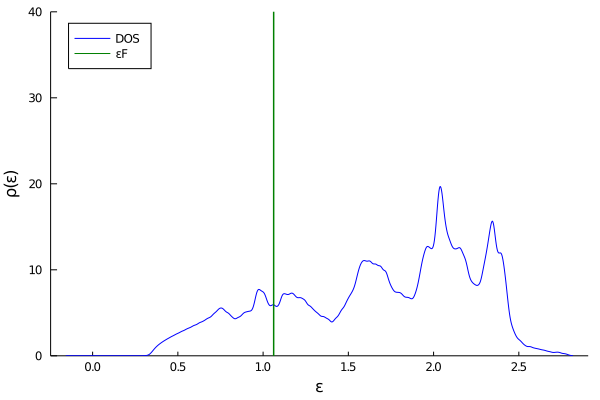

In [47]:
al_dos = plot_dos(scfres)
plot!(al_dos, ylabel="ρ(ε)", xlabel="ε", legend = :topleft, grid=false, ylims=(0, 40))

### Table Salt (NaCl)

#### Crystal structure
<img src="../structure/nacl.png" alt="drawing" width="300" align="left"/>

In [49]:
# crystal structure of copper (face-centerd cubic)
a = b = c = convert2bohr(5.69169);     # lattice parameters
Na_positions = [[0, 0, 0], 
                [0, 0.5, 0.5], 
                [0.5, 0.0, 0.5], 
                [0.5, 0.5, 0.0]];
Cl_positions = [[0.5, 0.0, 0.0], 
                 [0.5, 0.5, 0.5],
                 [0.0, 0.0, 0.5], 
                 [0.0, 0.5, 0.0]];

In [50]:
lattice = [[a 0 0]; [0 b 0]; [0 0 c]]

3×3 Array{Float64,2}:
 10.739   0.0     0.0
  0.0    10.739   0.0
  0.0     0.0    10.739

In [51]:
Na = ElementPsp(:Na, psp=load_psp(:Na, functional="lda"))
Cl = ElementPsp(:Cl, psp=load_psp(:Cl, functional="lda"))
atoms = [Na => Na_positions, Cl => Cl_positions];

In [52]:
model = model_LDA(lattice, atoms, temperature=0.01);

In [53]:
Ecut = 10 # Ha
kgrid = [10, 10, 10];
basis = PlaneWaveBasis(model, Ecut, kgrid=kgrid);

In [54]:
@time scfres = self_consistent_field(basis, n_bands = 44, mixing=KerkerMixing());

n     Free energy       Eₙ-Eₙ₋₁     ρout-ρin   Diag
---   ---------------   ---------   --------   ----
  1   -60.96125708943         NaN   5.97e-01    5.5 
  2   -61.09294711350   -1.32e-01   1.18e-01    3.3 
  3   -61.09431675525   -1.37e-03   2.30e-02    8.1 
  4   -61.09454730979   -2.31e-04   3.31e-03    3.5 
  5   -61.09455667743   -9.37e-06   1.36e-03    8.6 
  6   -61.09455748260   -8.05e-07   1.99e-04    4.1 
 90.818393 seconds (5.11 M allocations: 12.222 GiB, 1.42% gc time)


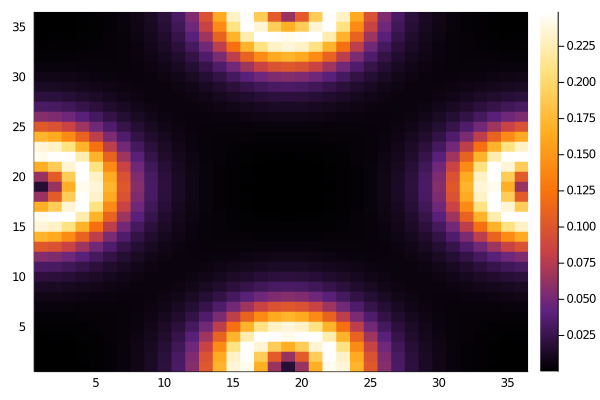

In [55]:
heatmap(scfres.ρ.real[:, :, 1, 1], c=:sunset)

Computing bands along kpath:
       Γ -> X -> W -> K -> Γ -> L -> U -> W -> L -> K  and  U -> X


Diagonalising Hamiltonian kblocks: 100%|████████████████| Time: 0:00:39


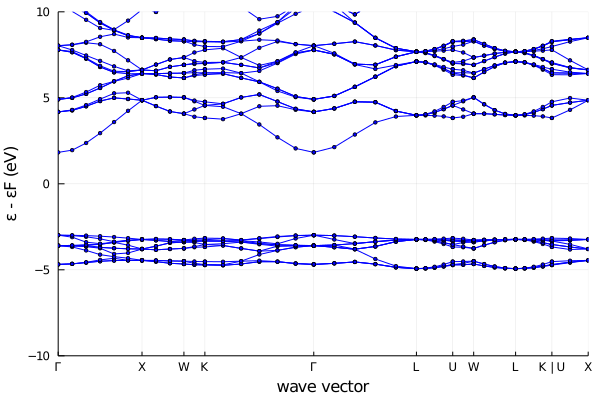

In [56]:
nacl_bands = plot_bandstructure(scfres, kline_density=5)
plot!(nacl_bands, ylabel="ε - εF (eV)", ylims=(-10, 10))

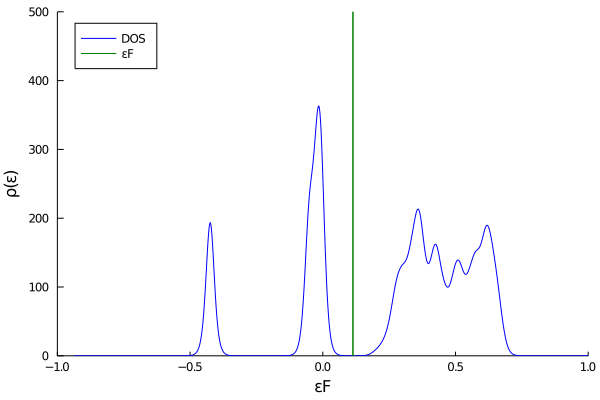

In [60]:
nacl_dos = plot_dos(scfres)
plot!(nacl_dos, ylabel="ρ(ε)", xlabel="εF", legend = :topleft, grid=false, xlims=(-1, 1), ylims=(0, 500))

# Compare & Contrast

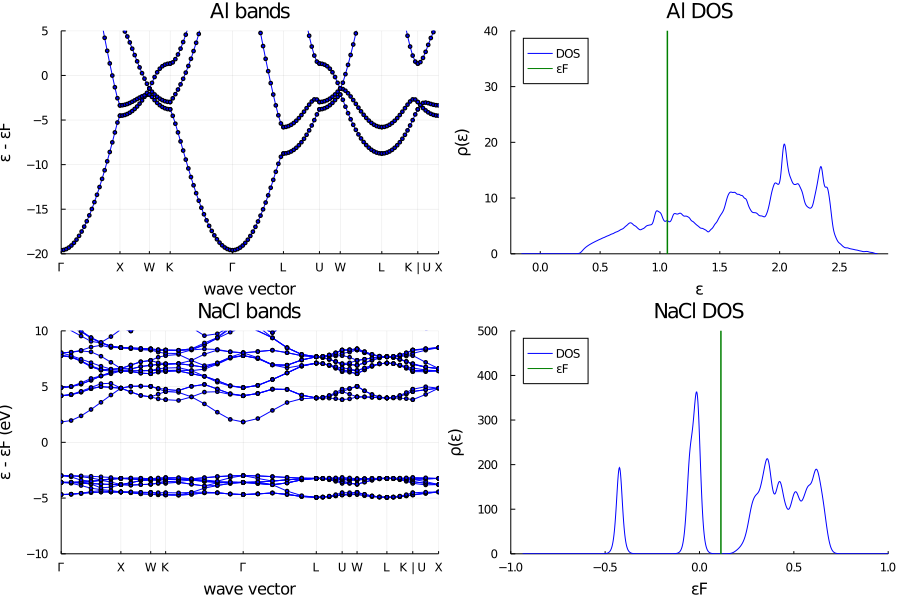

In [61]:
plot(al_bands, al_dos, nacl_bands, nacl_dos, layout = 4, size=(900, 600), title=["Al bands" "Al DOS" "NaCl bands" "NaCl DOS"])